In [43]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [59]:
# important imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, GlobalMaxPooling2D, Input, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow import keras

In [ ]:
import kagglehub
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")
print("Path to dataset files:", path)

Path to dataset files: /Users/kiwis/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


In [ ]:
# # Load Dataset
train_ds = keras.utils.image_dataset_from_directory(
    path+'/Training',
    image_size=(32, 32),  
    batch_size=32 
)

val_ds = keras.utils.image_dataset_from_directory(
    path+'/Testing',
    image_size=(32, 32),
    batch_size=32
)

train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))

x_train, y_train = [], []
for images, labels in train_ds:
    x_train.append(images.numpy())
    y_train.append(labels.numpy())

x_train = np.concatenate(x_train)
y_train = np.concatenate(y_train)

x_test, y_test = [], []
for images, labels in val_ds:
    x_test.append(images.numpy())
    y_test.append(labels.numpy())

x_test = np.concatenate(x_test)
y_test = np.concatenate(y_test)

# Print shapes
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
print("x_test.shape:", x_test.shape)
print("y_test.shape:", y_test.shape)


Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.
x_train.shape: (5712, 32, 32, 3)
y_train.shape: (5712,)
x_test.shape: (1311, 32, 32, 3)
y_test.shape: (1311,)


In [66]:
# # calculate number of classes
K = len(set(y_train))
print("Number of classes:", K)

Number of classes: 4


In [75]:
# Build and filter model
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3,3), strides=2, activation='relu')(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Droput(0.2)(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Droput(0.2)(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
#x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [76]:
#Compile and fit
# preferably use gpu for faster results
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs= 15)

Epoch 1/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.6180 - loss: 1.2275 - val_accuracy: 0.2288 - val_loss: 2.5461
Epoch 2/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.8014 - loss: 0.5132 - val_accuracy: 0.3257 - val_loss: 1.8245
Epoch 3/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.8456 - loss: 0.4001 - val_accuracy: 0.5461 - val_loss: 1.4802
Epoch 4/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.8899 - loss: 0.2907 - val_accuracy: 0.8276 - val_loss: 0.4650
Epoch 5/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8948 - loss: 0.2736 - val_accuracy: 0.8513 - val_loss: 0.3408
Epoch 6/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.9288 - loss: 0.1964 - val_accuracy: 0.8787 - val_loss: 0.3245
Epoch 7/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.9416 - loss: 0.1682 - val_accuracy: 0.9100 - val_loss: 0.2548
Epoch 8/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.9577 - loss: 0.1273 - val_accu

In [77]:
# # Fit with data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
  3/178 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8646 - loss: 0.4143 

/Users/kiwis/Documents/Projects/tumor_detect/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8694 - loss: 0.3881 - val_accuracy: 0.8360 - val_loss: 0.4204
Epoch 2/50
  1/178 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.9375 - loss: 0.1366

/Users/kiwis/Documents/Projects/tumor_detect/.venv/lib/python3.9/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.1366 - val_accuracy: 0.8513 - val_loss: 0.3885
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.8997 - loss: 0.2709 - val_accuracy: 0.9275 - val_loss: 0.1963
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.1360 - val_accuracy: 0.9298 - val_loss: 0.1903
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9218 - loss: 0.2263 - val_accuracy: 0.8200 - val_loss: 0.4285
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0334 - val_accuracy: 0.8207 - val_loss: 0.4372
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9266 - loss: 0.1940 - val_accuracy: 0.9314 - val_loss: 0.1908
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8750 - loss: 0.2596 - val_accuracy: 0.9199 - val_loss: 0.2025
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9278 - loss: 0.2092 - val_accuracy: 0.9062 - 

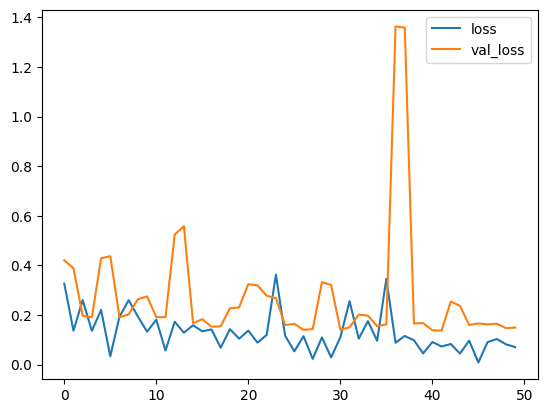

In [78]:
# plot loss per epoch (iteration)
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

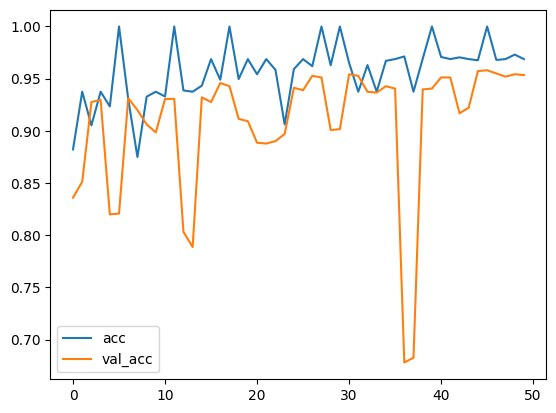

In [79]:
# plot accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Confusion matrix, without normalization
[[277  19   2   2]
 [  5 287  11   3]
 [  0   3 402   0]
 [  6  10   0 284]]


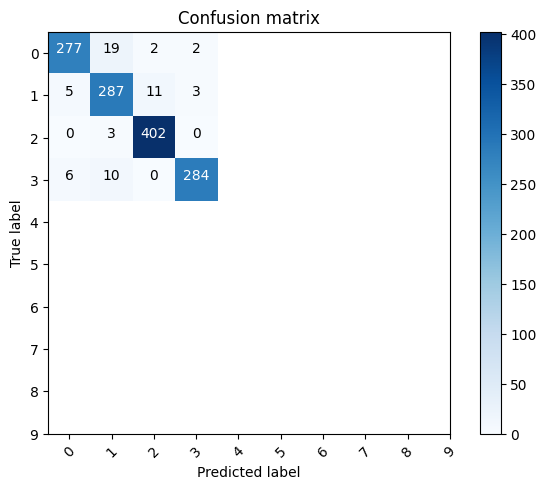

In [93]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [81]:
#label mapping (hardcoded)
labels = '''glioma
meningioma
notumor
pituitary'''.split()

Text(0.5, 1.0, 'True label: pituitary Predicted: pituitary')

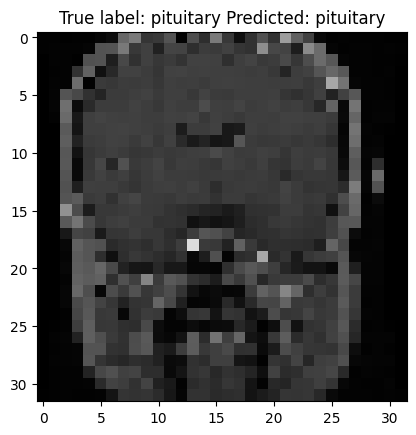

In [106]:
correct_idx = np.where(p_test == y_test)[0]
i = np.random.choice(correct_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))

Text(0.5, 1.0, 'True label: glioma Predicted: meningioma')

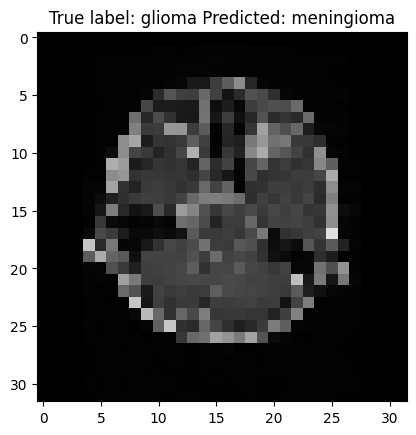

In [103]:
missclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))

In [99]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │       132,096 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,273,198 (4.86 MB)

 Trainable params: 424,100 (1.62 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 848,202 (3.24 MB)